In [53]:
import matplotlib.pyplot as plt
from matplotlib import rcParams
import pandas as pd
import numpy as np
from statsbombpy import sb
from mplsoccer import Pitch, VerticalPitch, FontManager, Sbopen
from IPython.display import display
import json

rcParams['text.color'] = '#c7d5cc'  # set the default text color

In [54]:
parser = Sbopen()
df = parser.match(competition_id=11, season_id=90)

In [55]:
print(df.columns)

Index(['match_id', 'match_date', 'kick_off', 'home_score', 'away_score',
       'match_status', 'match_status_360', 'last_updated', 'last_updated_360',
       'match_week', 'competition_id', 'country_name', 'competition_name',
       'season_id', 'season_name', 'home_team_id', 'home_team_name',
       'home_team_gender', 'home_team_group', 'home_team_country_id',
       'home_team_country_name', 'home_team_managers_id',
       'home_team_managers_name', 'home_team_managers_nickname',
       'home_team_managers_dob', 'home_team_managers_country_id',
       'home_team_managers_country_name', 'away_team_id', 'away_team_name',
       'away_team_gender', 'away_team_group', 'away_team_country_id',
       'away_team_country_name', 'away_team_managers_id',
       'away_team_managers_name', 'away_team_managers_nickname',
       'away_team_managers_dob', 'away_team_managers_country_id',
       'away_team_managers_country_name', 'metadata_data_version',
       'metadata_shot_fidelity_version', 'm

In [56]:
team = "Barcelona"

# Get list of games by our team, either home or away
match_ids = df.loc[(df["home_team_name"] == team) | (df["away_team_name"] == team)]["match_id"].tolist()

# Calculate number of games
no_games = len(match_ids)

# For left-foot passes

In [61]:
left_foot_passes = pd.DataFrame()
for idx in match_ids:
    #open the event data from this game
    df = parser.event(idx)[0]
    for period in [1, 2]:
        mask_messi = (df.type_name == 'Pass') & (df.player_id == 5503)
        df_pass = df.loc[mask_messi, ['x', 'y', 'end_x', 'end_y', 'outcome_name', 'id', 'body_part_name']]
        mask_complete = df_pass.outcome_name.isnull()
        
        mask_messi_left = (df_pass['body_part_name'] == 'Left Foot') & (df.type_name == 'Pass') & (df.player_id == 5503)
        mask_messi_right = (df_pass['body_part_name'] == 'Right Foot') & (df.type_name == 'Pass') & (df.player_id == 5503)

        left_foot_passes = pd.concat([left_foot_passes, df_pass[mask_messi_left][mask_complete]], ignore_index=True)
        
        #mask_messi_left = (['body_part_name'] == 'Left Foot') & (df.type_name == 'Pass') & (df.player_id == 5503) & (df.outcome_name.isnull()) & (df.sub_type_name.isnull()) & (df.period == period)
        #lefty_passes = df.loc[mask_messi_left, ["x", "y", "end_x", "end_y"]]     
                                                                                                        

In [64]:
print(left_foot_passes)

          x     y  end_x  end_y outcome_name  \
0      60.0  40.0   49.4   37.6          NaN   
1      68.1  57.1   92.5    4.5          NaN   
2      93.0  26.2  108.5   13.2          NaN   
3      81.9  73.1   57.0   54.1          NaN   
4      66.5  38.1   75.4   35.1          NaN   
...     ...   ...    ...    ...          ...   
3503  104.5  78.3   96.0   62.3          NaN   
3504   70.8  75.2   91.4   71.5          NaN   
3505   98.6  74.6  100.5   63.8          NaN   
3506   69.8  45.5   78.5   23.9          NaN   
3507  120.0  80.0   90.4   56.9          NaN   

                                        id body_part_name  
0     daac9c8d-95b6-4e42-8cfa-b05779fd7755      Left Foot  
1     8f147852-3ee3-4e02-8687-3fcccf5ee697      Left Foot  
2     85f9abc7-9ec5-4ef0-8847-b77efd77998f      Left Foot  
3     c9b6c0a7-5fb0-41c0-8bba-704bc43131fa      Left Foot  
4     a4d90cfe-e702-4db7-9e8e-1db6a2ec908e      Left Foot  
...                                    ...            ...  
350

# Chat GPT Trial

In [69]:
print(left_foot_passes.info())
print(mask_complete.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3508 entries, 0 to 3507
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   x               3508 non-null   float64
 1   y               3508 non-null   float64
 2   end_x           3508 non-null   float64
 3   end_y           3508 non-null   float64
 4   outcome_name    0 non-null      object 
 5   id              3508 non-null   object 
 6   body_part_name  3508 non-null   object 
dtypes: float64(4), object(3)
memory usage: 192.0+ KB
None
<class 'pandas.core.series.Series'>
RangeIndex: 51 entries, 0 to 50
Series name: outcome_name
Non-Null Count  Dtype
--------------  -----
51 non-null     bool 
dtypes: bool(1)
memory usage: 179.0 bytes
None


In [70]:
mask_complete.reset_index(drop=True, inplace=True)

In [71]:
filtered_passes = left_foot_passes.loc[mask_complete]

IndexingError: Unalignable boolean Series provided as indexer (index of the boolean Series and of the indexed object do not match).

In [72]:
print(left_foot_passes.index)
print(mask_complete.index)

RangeIndex(start=0, stop=3508, step=1)
RangeIndex(start=0, stop=51, step=1)


In [75]:
left_foot_passes.reset_index(drop=True, inplace=True)
mask_complete.reset_index(drop=True, inplace=True)

# Drop NaN values from mask_complete
mask_complete = mask_complete.dropna()

# Create the is_complete column in left_foot_passes
left_foot_passes['is_complete'] = mask_complete

# Filter the DataFrame based on is_complete
filtered_passes = left_foot_passes[left_foot_passes['is_complete']]

lc1 = pitch.lines(filtered_passes['x'], filtered_passes['y'], filtered_passes['end_x'], filtered_passes['end_y'],
                  lw=5, transparent=True, comet=True, label='completed left-footed passes',
                  color='#ad993c', ax=ax)

ValueError: Cannot mask with non-boolean array containing NA / NaN values

In [68]:
left_foot_passes.reset_index(drop=True, inplace=True)

filtered_passes = left_foot_passes.loc[mask_complete]
lc1 = pitch.lines(filtered_passes['x'], filtered_passes['y'], filtered_passes['end_x'], filtered_passes['end_y'],
                  lw=5, transparent=True, comet=True, label='completed left-footed passes',
                  color='#ad993c', ax=ax)

IndexingError: Unalignable boolean Series provided as indexer (index of the boolean Series and of the indexed object do not match).

IndexingError: Unalignable boolean Series provided as indexer (index of the boolean Series and of the indexed object do not match).

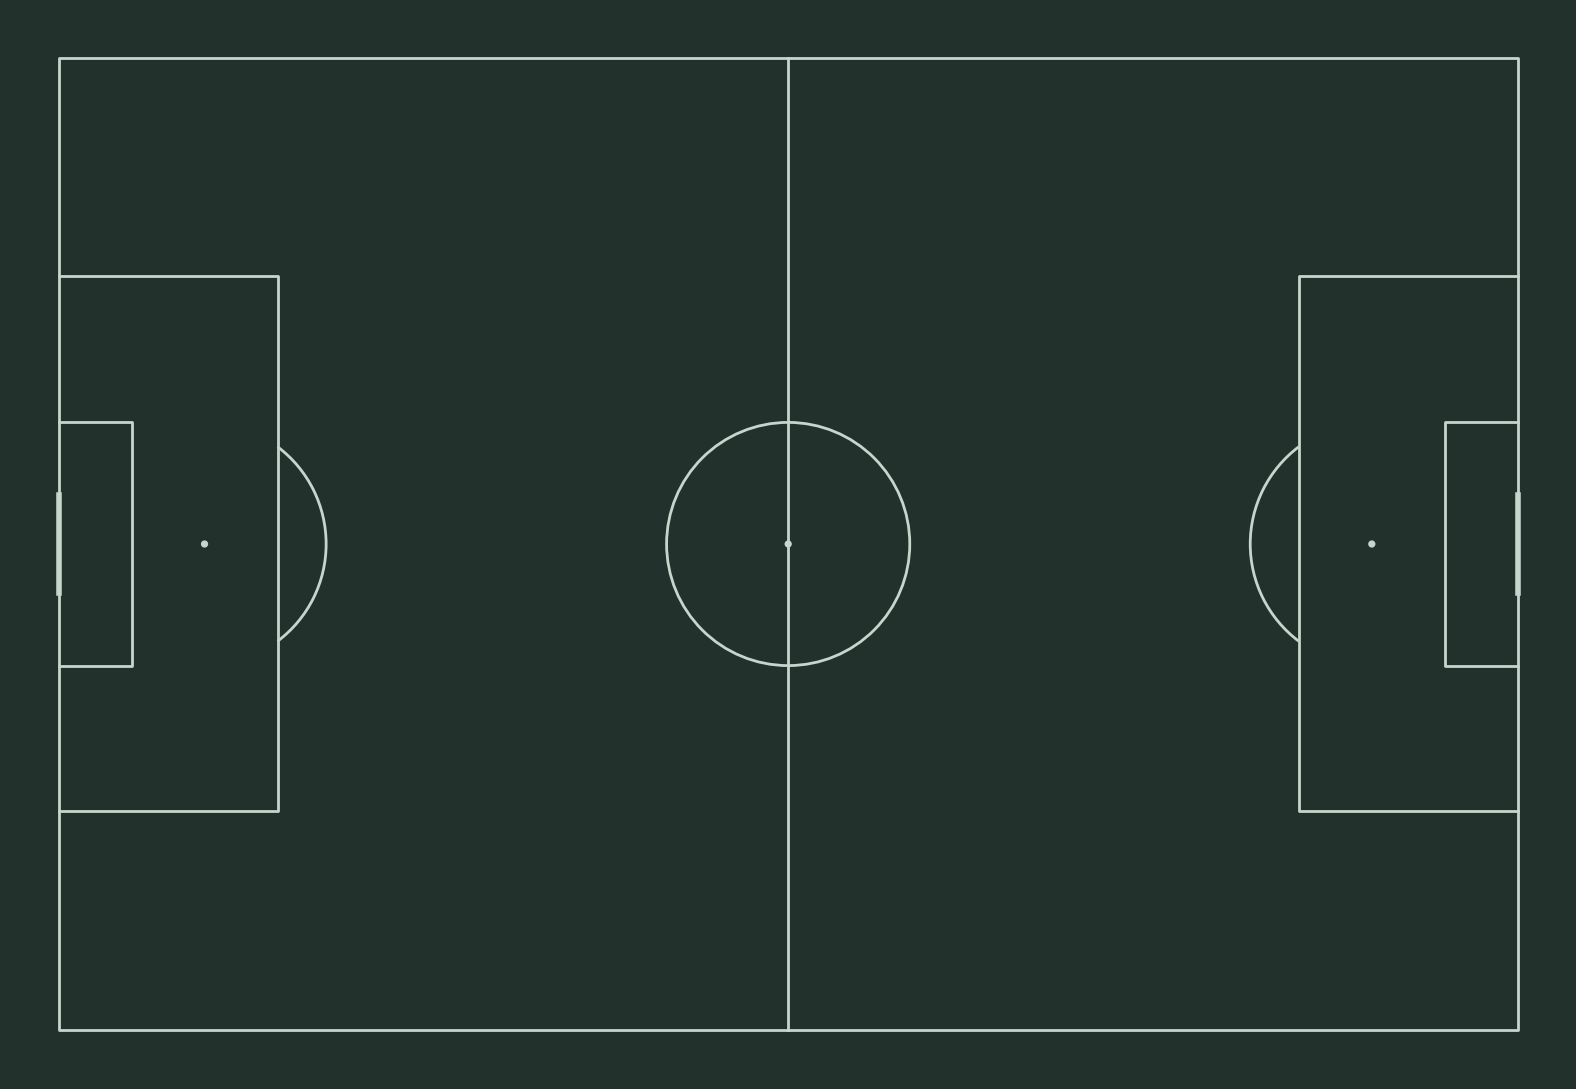

In [63]:
left_foot_passes = left_foot_passes.reset_index(drop=True)

# Setup the pitch
pitch = Pitch(pitch_type='statsbomb', pitch_color='#22312b', line_color='#c7d5cc')
fig, ax = pitch.draw(figsize=(16, 11), constrained_layout=False, tight_layout=True)
fig.set_facecolor('#22312b')

lc1 = pitch.lines(left_foot_passes[mask_complete]['x'], left_foot_passes[mask_complete]['y'], ...)


# Plot the left-footed completed passes
lc1 = pitch.lines(left_foot_passes[mask_complete]['x'], left_foot_passes[mask_complete]['y'],
                  left_foot_passes[mask_complete]['end_x'], left_foot_passes[mask_complete]['end_y'],
                  lw=5, transparent=True, comet=True, label='completed left-footed passes',
                  color='#ad993c', ax=ax)

# Plot the other left-footed passes
lc2 = pitch.lines(left_foot_passes[~mask_complete]['x'], left_foot_passes[~mask_complete]['y'],
                  left_foot_passes[~mask_complete]['end_x'], left_foot_passes[~mask_complete]['end_y'],
                  lw=5, transparent=True, comet=True, label='incomplete left-footed passes',
                  color='#ba4f45', ax=ax)

# Plot the legend
ax.legend(facecolor='#22312b', edgecolor='None', fontsize=20, loc='upper left', handlelength=4)

# Set the title
fig.suptitle("Messi's left-footed passes vs France", fontsize=30)

Text(0.5, 0.98, "Messi's left-footed passes during 2020-21 La-Liga Season")

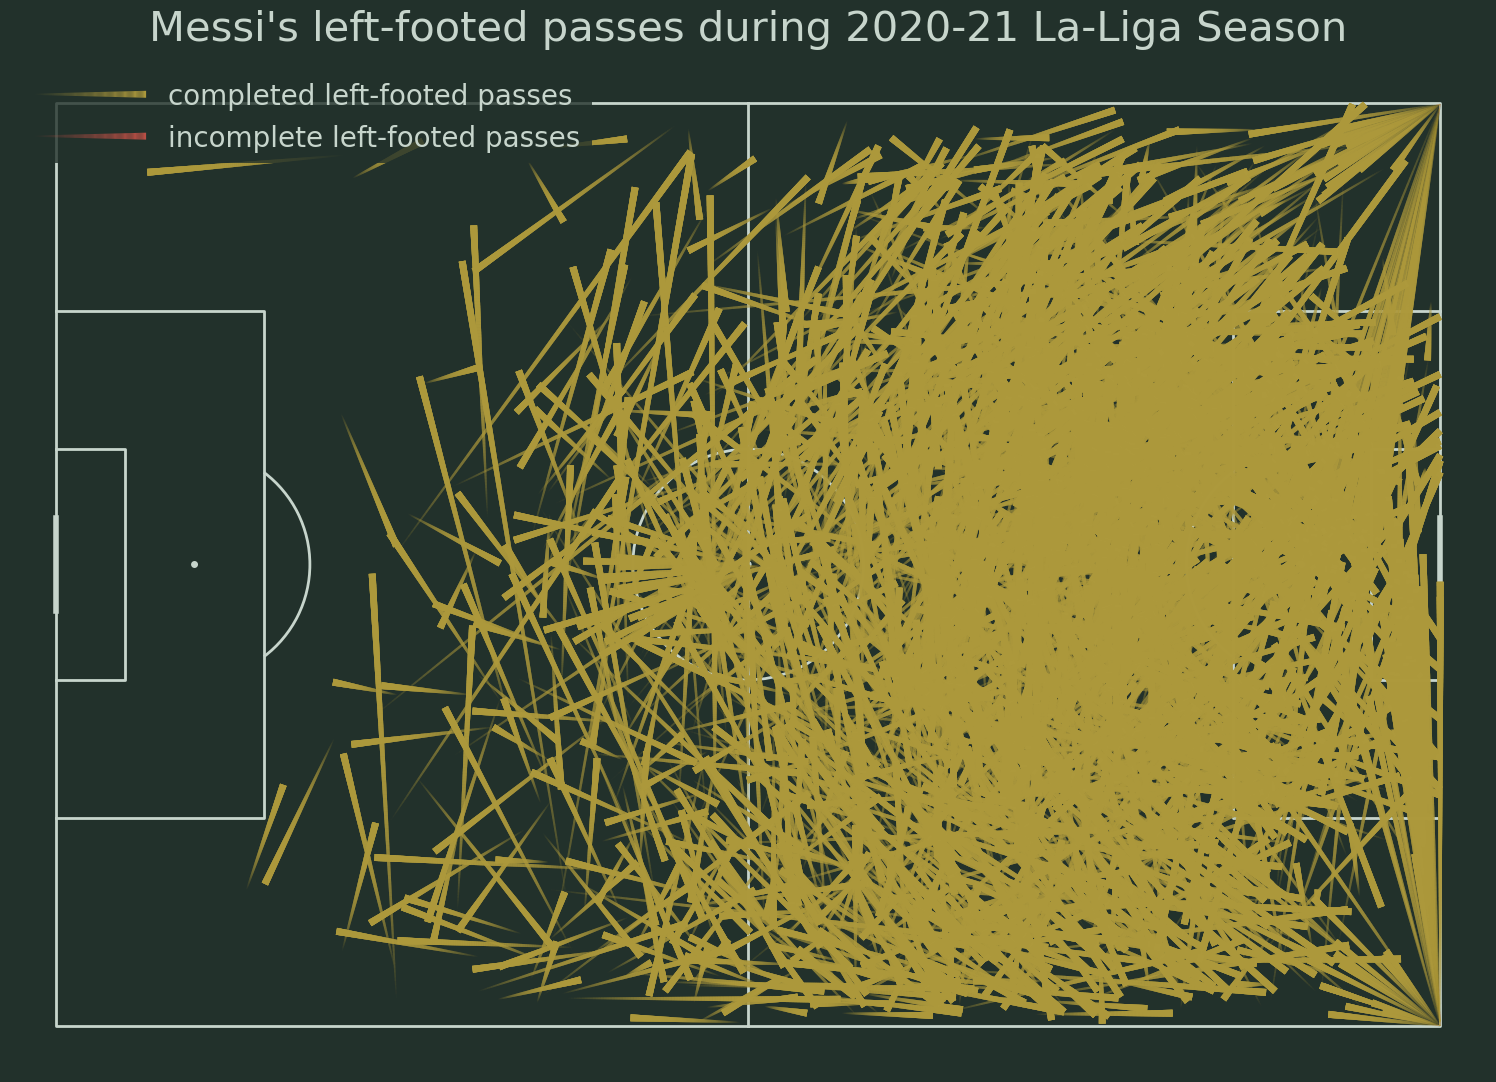

In [48]:
# Setup the pitch
pitch = Pitch(pitch_type='statsbomb', pitch_color='#22312b', line_color='#c7d5cc')
fig, ax = pitch.draw(figsize=(16, 11), constrained_layout=False, tight_layout=True)
fig.set_facecolor('#22312b')

# Reset the index of the left_foot_passes DataFrame
mask_complete = pd.DataFrame(mask_complete, columns=['mask'])
mask_complete = mask_complete[mask_complete['mask']]

# Reset the index of the left_foot_passes DataFrame
left_foot_passes = left_foot_passes.reset_index(drop=True)

# Plot the left-footed completed passes
lc1 = pitch.lines(left_foot_passes.x, left_foot_passes.y,
                  left_foot_passes.end_x, left_foot_passes.end_y,
                  lw=5, transparent=True, comet=True, label='completed left-footed passes',
                  color='#ad993c', ax=ax)

# Plot the legend
ax.legend(facecolor='#22312b', edgecolor='None', fontsize=20, loc='upper left', handlelength=4)

# Set the title
fig.suptitle("Messi's left-footed passes during 2020-21 La-Liga Season", fontsize=30)

Text(0.5, 0.98, "Messi's left-footed passes during 2020-21 La-Liga Season")

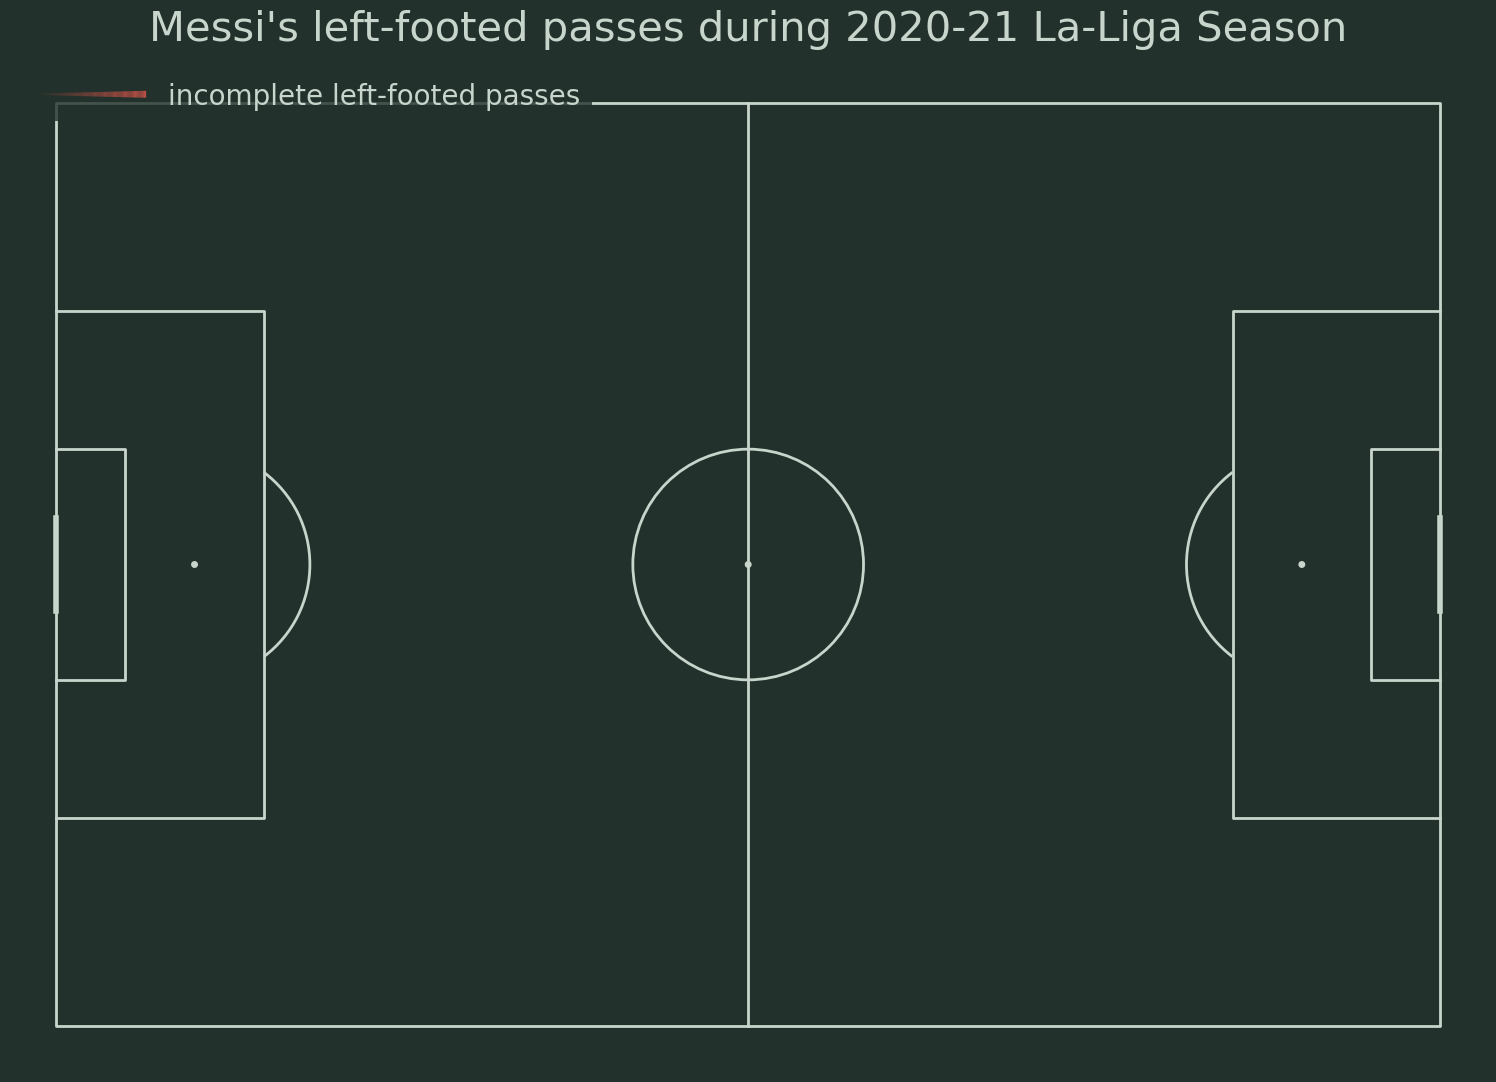

In [51]:
# Setup the pitch
pitch = Pitch(pitch_type='statsbomb', pitch_color='#22312b', line_color='#c7d5cc')
fig, ax = pitch.draw(figsize=(16, 11), constrained_layout=False, tight_layout=True)
fig.set_facecolor('#22312b')

# Plot the other left-footed passes
lc2 = pitch.lines(left_foot_passes[mask_complete == False].x, left_foot_passes[mask_complete == False].y,
                  left_foot_passes[mask_complete == False].end_x, left_foot_passes[mask_complete == False].end_y,
                  lw=5, transparent=True, comet=True, label='incomplete left-footed passes',
                  color='#ba4f45', ax=ax)

# Plot the legend
ax.legend(facecolor='#22312b', edgecolor='None', fontsize=20, loc='upper left', handlelength=4)

# Set the title
fig.suptitle("Messi's left-footed passes during 2020-21 La-Liga Season", fontsize=30)

# This Partially Works

Text(0.5, 0.98, "Messi's left-footed passes during 2020-21 La Liga Season")

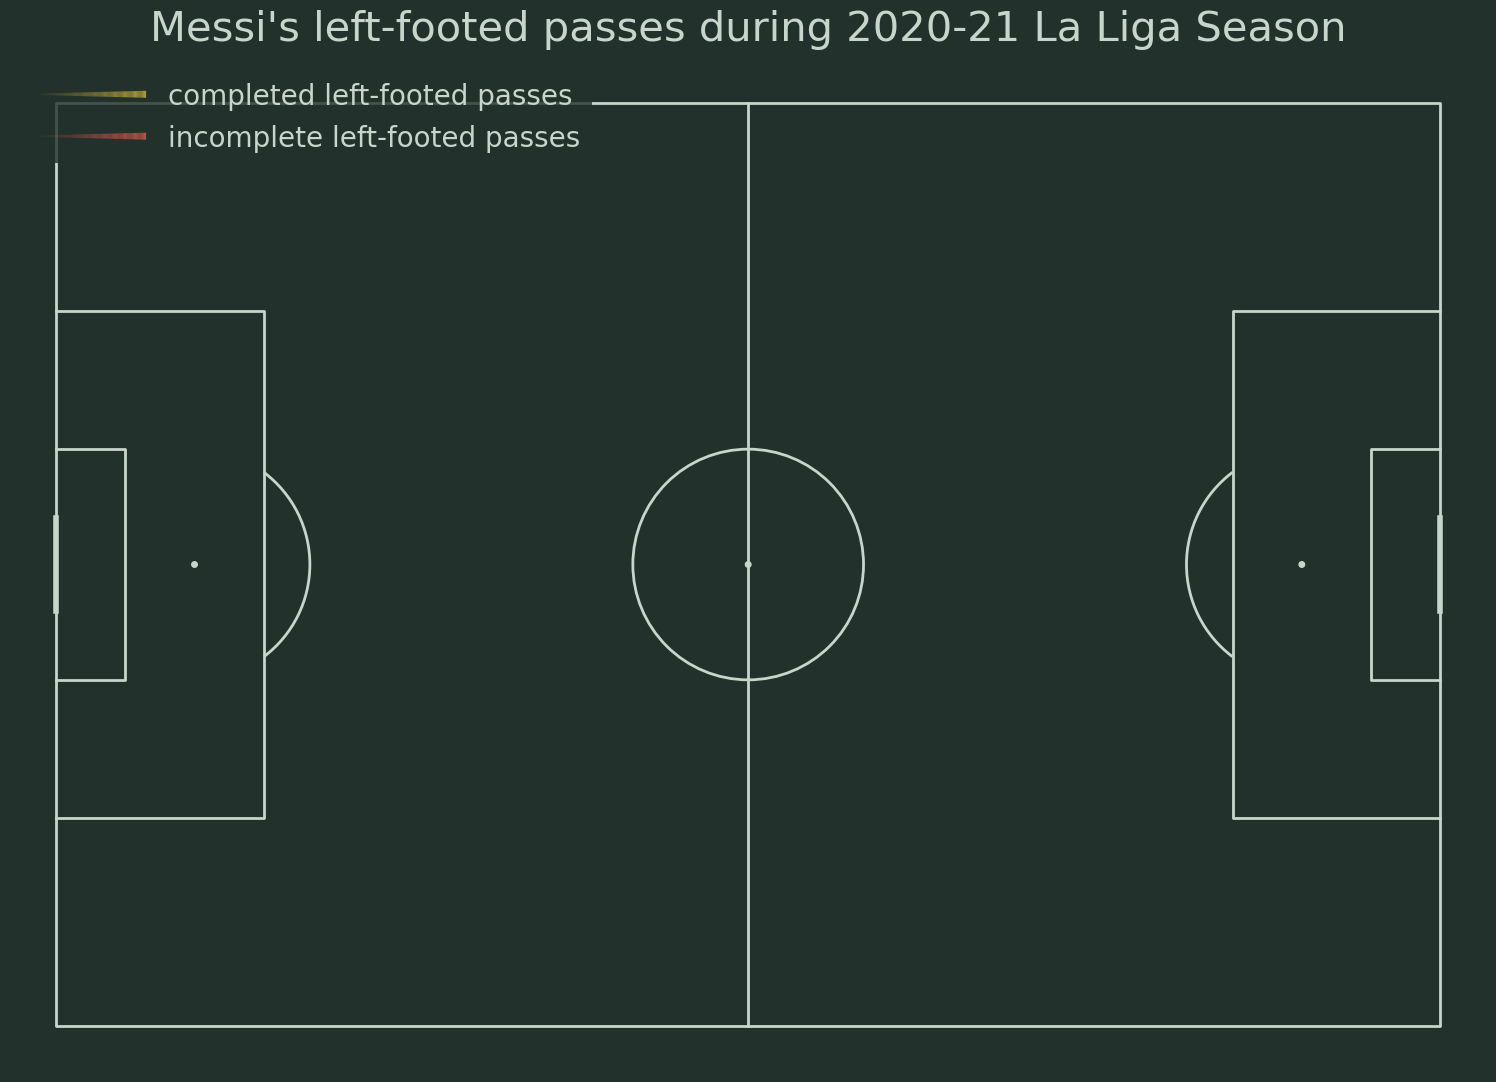

In [52]:
#ChatGPT Trial Code

# Setup the pitch
pitch = Pitch(pitch_type='statsbomb', pitch_color='#22312b', line_color='#c7d5cc')
fig, ax = pitch.draw(figsize=(16, 11), constrained_layout=False, tight_layout=True)
fig.set_facecolor('#22312b')

# Plot the left-footed completed passes
lc1 = pitch.lines(left_foot_passes[mask_complete].x, left_foot_passes[mask_complete].y,
                  left_foot_passes[mask_complete].end_x, left_foot_passes[mask_complete].end_y,
                  lw=5, transparent=True, comet=True, label='completed left-footed passes',
                  color='#ad993c', ax=ax)

# Plot the left-footed incomplete passes
lc2 = pitch.lines(left_foot_passes[~mask_complete].x, left_foot_passes[~mask_complete].y,
                  left_foot_passes[~mask_complete].end_x, left_foot_passes[~mask_complete].end_y,
                  lw=5, transparent=True, comet=True, label='incomplete left-footed passes',
                  color='#ba4f45', ax=ax)

# Plot the legend
ax.legend(facecolor='#22312b', edgecolor='None', fontsize=20, loc='upper left', handlelength=4)

# Set the title
fig.suptitle("Messi's left-footed passes during 2020-21 La Liga Season", fontsize=30)


In [ ]:
# Plot the other left-footed passes
lc2 = pitch.lines(left_foot_passes[~mask_complete].x, left_foot_passes[~mask_complete].y,
                  left_foot_passes[~mask_complete].end_x, left_foot_passes[~mask_complete].end_y,
                  lw=5, transparent=True, comet=True, label='incomplete left-footed passes',
                  color='#ba4f45', ax=ax)

Text(0.5, 0.98, "Messi's right-footed passes during 2020-21 La-Liga Season")

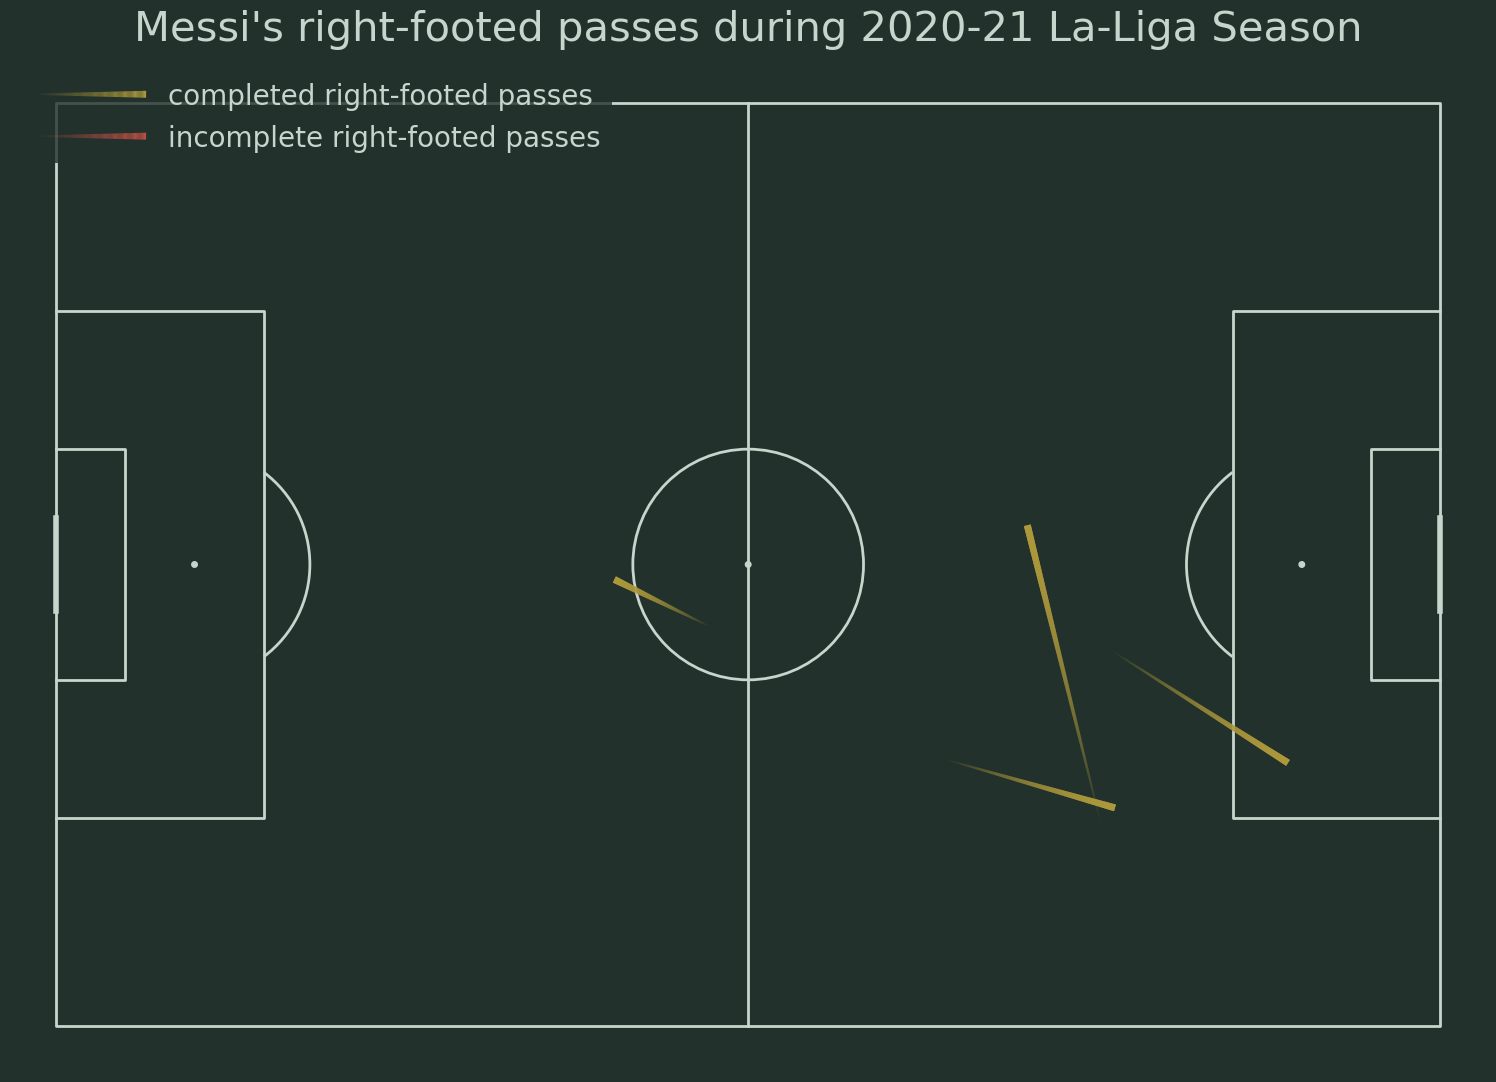

In [25]:
# Setup the pitch
pitch = Pitch(pitch_type='statsbomb', pitch_color='#22312b', line_color='#c7d5cc')
fig, ax = pitch.draw(figsize=(16, 11), constrained_layout=False, tight_layout=True)
fig.set_facecolor('#22312b')

# Plot the right-footed completed passes
lc1 = pitch.lines(df_pass[mask_messi_right & mask_complete].x, df_pass[mask_messi_right & mask_complete].y,
                  df_pass[mask_messi_right & mask_complete].end_x, df_pass[mask_messi_right & mask_complete].end_y,
                  lw=5, transparent=True, comet=True, label='completed right-footed passes',
                  color='#ad993c', ax=ax)

# Plot the other right-footed passes
lc2 = pitch.lines(df_pass[mask_messi_right & ~mask_complete].x, df_pass[mask_messi_right & ~mask_complete].y,
                  df_pass[mask_messi_right & ~mask_complete].end_x, df_pass[mask_messi_right & ~mask_complete].end_y,
                  lw=5, transparent=True, comet=True, label='incomplete right-footed passes',
                  color='#ba4f45', ax=ax)

# Plot the legend
ax.legend(facecolor='#22312b', edgecolor='None', fontsize=20, loc='upper left', handlelength=4)

# Set the title
fig.suptitle("Messi's right-footed passes during 2020-21 La-Liga Season", fontsize=30)


In [15]:
mask_messi = (df.type_name == 'Pass') & (df.player_id == 5503)

AttributeError: 'DataFrame' object has no attribute 'type_name'

In [ ]:
df_pass = df.loc[mask_messi, ['x', 'y', 'end_x', 'end_y', 'outcome_name', 'id', 'body_part_name']]
mask_complete = df_pass.outcome_name.isnull()

In [ ]:
df_pass.head()

In [ ]:
mask_messi_left = (df_pass['body_part_name'] == 'Left Foot') & (df.type_name == 'Pass') & (df.player_id == 5503)
mask_messi_right = (df_pass['body_part_name'] == 'Right Foot') & (df.type_name == 'Pass') & (df.player_id == 5503)

In [ ]:
        mask_complete = df_pass.outcome_name.isnull()
        mask_messi_left = (df_pass['body_part_name'] == 'Left Foot') & (df.type_name == 'Pass') & (df.player_id == 5503) & (df.outcome_name.isnull()) & (df.sub_type_name.isnull()) & (df.period == period)
        lefty_passes = df.loc[mask_messi_left, ["x", "y", "end_x", "end_y"]]                   

In [12]:
df_pass = df.loc[mask_messi, ['x', 'y', 'end_x', 'end_y', 'outcome_name', 'id', 'body_part_name']]
mask_complete = df_pass.outcome_name.isnull()

In [13]:
df_pass.head()

,x,y,end_x,end_y,outcome_name,id,body_part_name
87,76.6,35.7,116.2,8.9,NaN,1552304a-f3c0-42bf-b7ff-d7b0173d7488,Left Foot
97,99.3,57.3,96.7,49.8,NaN,f9405131-3f16-47bc-ab94-082f20057f60,Left Foot
139,67.9,59.0,49.0,60.3,NaN,dcc37e05-d4f7-46ee-8697-9d0376ccccc0,Left Foot
173,81.8,65.2,70.2,67.7,NaN,4af1c94c-9d4f-4f52-a365-1a1f6cf609cd,Right Foot
308,39.2,48.1,65.3,35.4,NaN,4e969f98-9588-487e-ba88-3d797c6e2fa7,Left Foot


In [16]:
# Filter the dataframe for Messi's left-footed passes
mask_messi_left = (df_pass['body_part_name'] == 'Left Foot') & (df.type_name == 'Pass') & (df.player_id == 5503)
mask_messi_right = (df_pass['body_part_name'] == 'Right Foot') & (df.type_name == 'Pass') & (df.player_id == 5503)

Text(0.5, 0.98, "Messi's left-footed passes vs France")

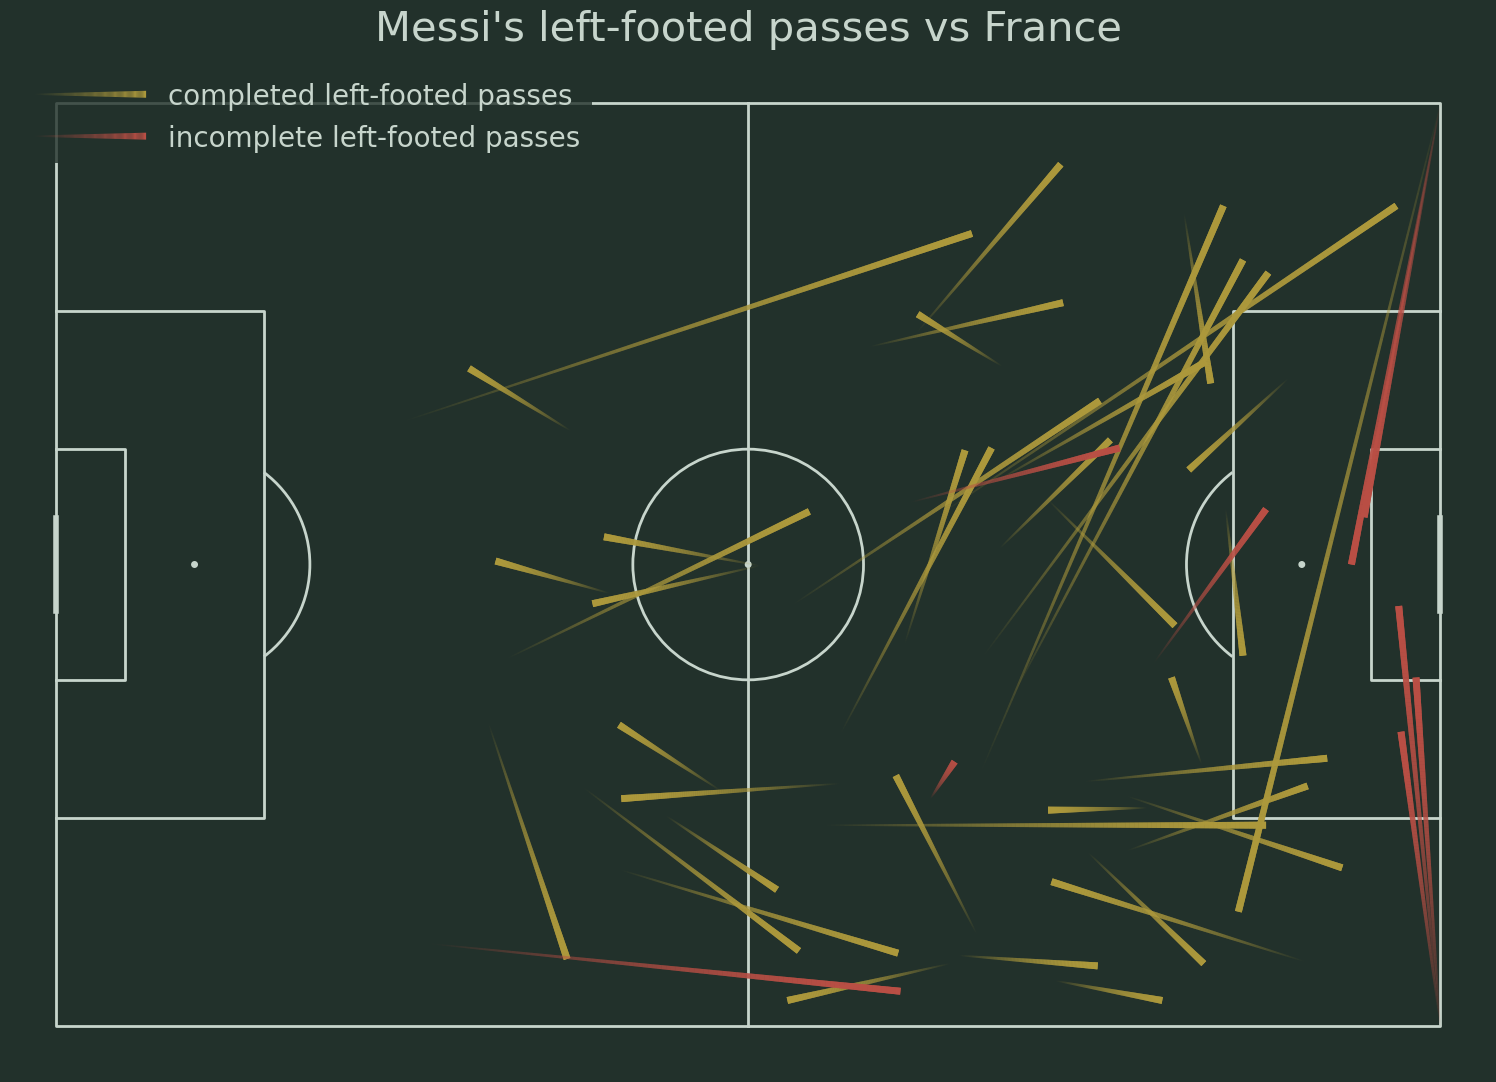

In [17]:
# Setup the pitch
pitch = Pitch(pitch_type='statsbomb', pitch_color='#22312b', line_color='#c7d5cc')
fig, ax = pitch.draw(figsize=(16, 11), constrained_layout=False, tight_layout=True)
fig.set_facecolor('#22312b')

# Plot the left-footed completed passes
lc1 = pitch.lines(df_pass[mask_messi_left & mask_complete].x, df_pass[mask_messi_left & mask_complete].y,
                  df_pass[mask_messi_left & mask_complete].end_x, df_pass[mask_messi_left & mask_complete].end_y,
                  lw=5, transparent=True, comet=True, label='completed left-footed passes',
                  color='#ad993c', ax=ax)

# Plot the other left-footed passes
lc2 = pitch.lines(df_pass[mask_messi_left & ~mask_complete].x, df_pass[mask_messi_left & ~mask_complete].y,
                  df_pass[mask_messi_left & ~mask_complete].end_x, df_pass[mask_messi_left & ~mask_complete].end_y,
                  lw=5, transparent=True, comet=True, label='incomplete left-footed passes',
                  color='#ba4f45', ax=ax)

# Plot the legend
ax.legend(facecolor='#22312b', edgecolor='None', fontsize=20, loc='upper left', handlelength=4)

# Set the title
fig.suptitle("Messi's left-footed passes vs France", fontsize=30)


Text(0.5, 0.98, "Messi's right-footed passes vs France")

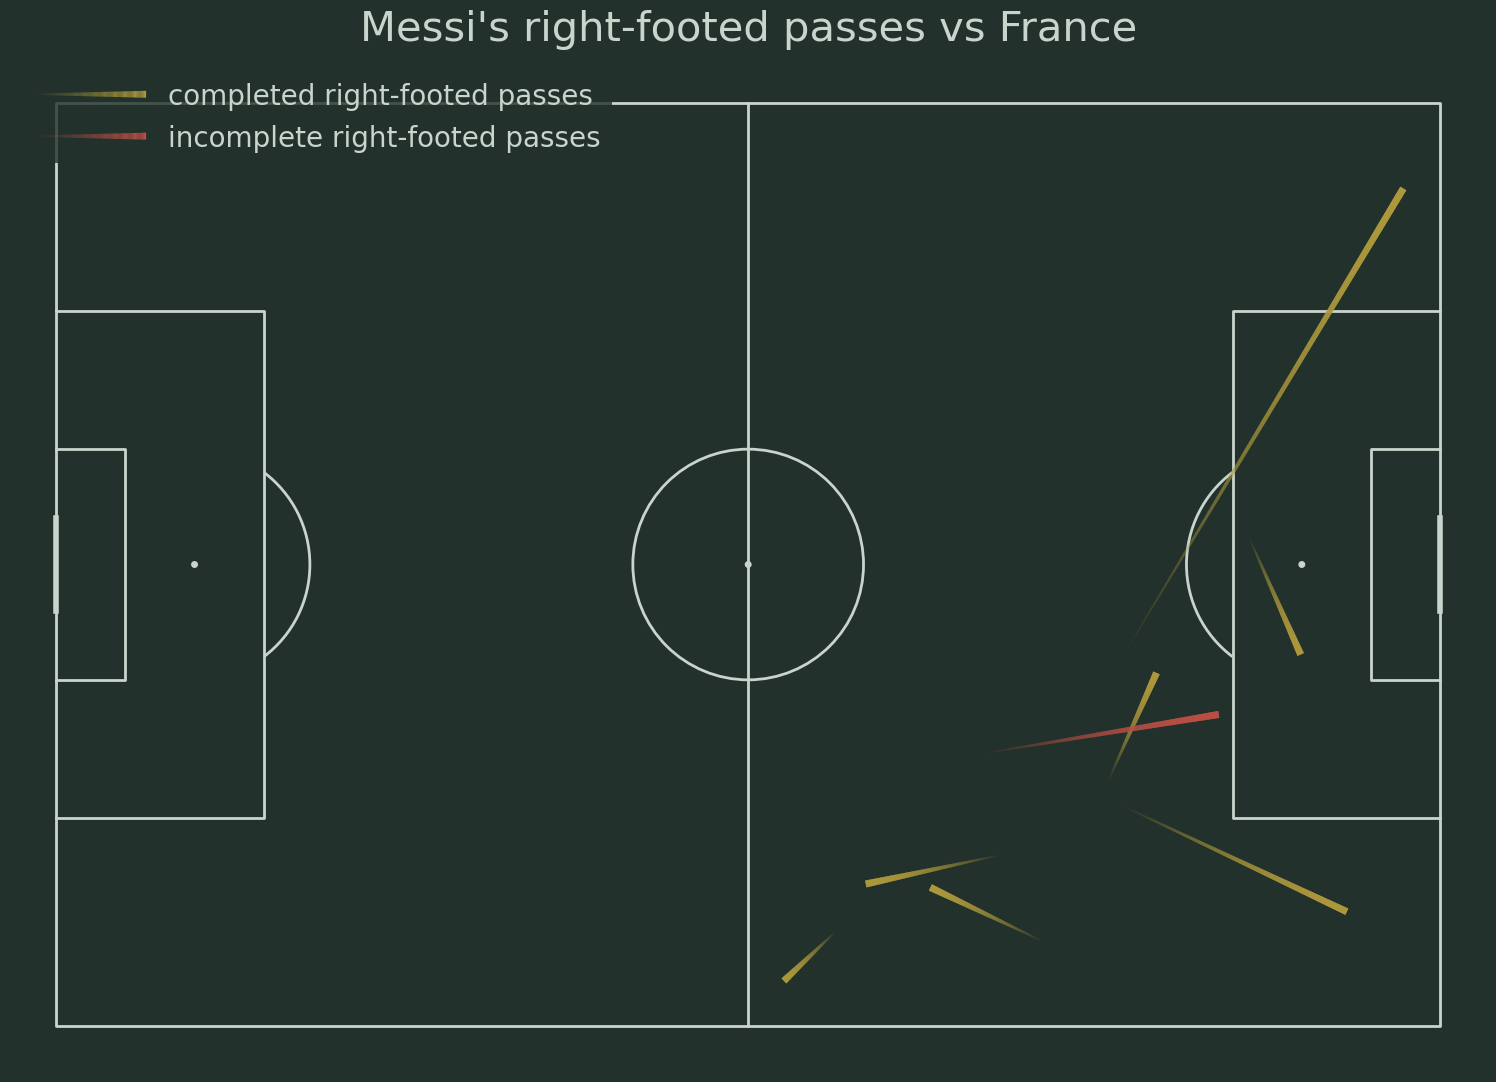

In [19]:
# Setup the pitch
pitch = Pitch(pitch_type='statsbomb', pitch_color='#22312b', line_color='#c7d5cc')
fig, ax = pitch.draw(figsize=(16, 11), constrained_layout=False, tight_layout=True)
fig.set_facecolor('#22312b')

# Plot the right-footed completed passes
lc1 = pitch.lines(df_pass[mask_messi_right & mask_complete].x, df_pass[mask_messi_right & mask_complete].y,
                  df_pass[mask_messi_right & mask_complete].end_x, df_pass[mask_messi_right & mask_complete].end_y,
                  lw=5, transparent=True, comet=True, label='completed right-footed passes',
                  color='#ad993c', ax=ax)

# Plot the other right-footed passes
lc2 = pitch.lines(df_pass[mask_messi_right & ~mask_complete].x, df_pass[mask_messi_right & ~mask_complete].y,
                  df_pass[mask_messi_right & ~mask_complete].end_x, df_pass[mask_messi_right & ~mask_complete].end_y,
                  lw=5, transparent=True, comet=True, label='incomplete right-footed passes',
                  color='#ba4f45', ax=ax)

# Plot the legend
ax.legend(facecolor='#22312b', edgecolor='None', fontsize=20, loc='upper left', handlelength=4)

# Set the title
fig.suptitle("Messi's right-footed passes vs France", fontsize=30)


# Link used for this visualization

In [ ]:
#https://mplsoccer.readthedocs.io/en/latest/gallery/pitch_plots/plot_lines.html#sphx-glr-gallery-pitch-plots-plot-lines-py